[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving country_wise_latest.csv to country_wise_latest (3).csv


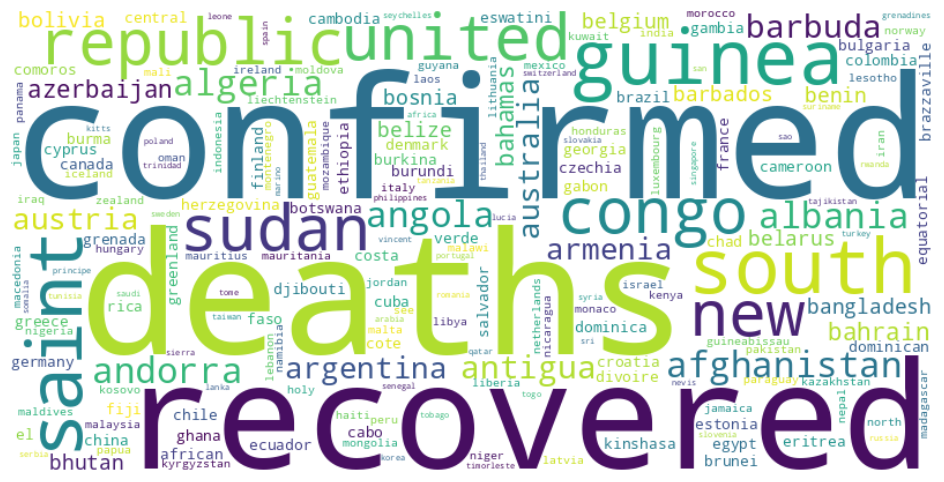

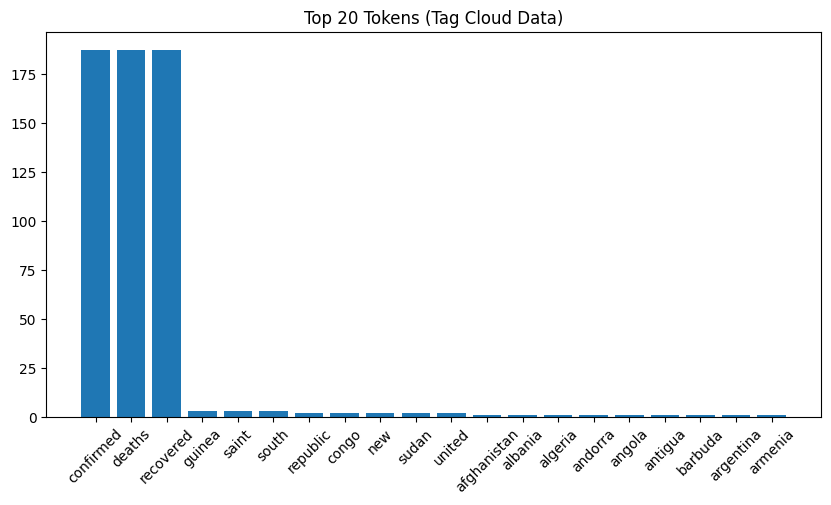

In [ ]:
# ===============================
# Task 7 - Text Network Analysis (with file upload in Colab)
# ===============================

# STEP 1 - Install libraries (Colab only)
!pip install wordcloud pyvis nltk

# STEP 2 - Import libraries
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import networkx as nx
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from pyvis.network import Network

from google.colab import files  # for upload
from IPython.display import IFrame  # for displaying network graph

# Download NLTK stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

# STEP 3 - Upload dataset
uploaded = files.upload()   # 👈 will prompt you to select your CSV file
# Example: choose `country_wise_latest.csv`

# Load the dataset (make sure filename matches your uploaded file)
df = pd.read_csv("country_wise_latest.csv")
df.head()

# STEP 4 - Create text corpus from dataset
documents = []
for _, row in df.iterrows():
    text = f"{row['Country/Region']} confirmed {row['Confirmed']} deaths {row['Deaths']} recovered {row['Recovered']}"
    documents.append(text)

# Save corpus as text (optional)
with open("corpus.txt", "w") as f:
    for d in documents:
        f.write(d + "\n")

# STEP 5 - Preprocessing
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop]
    return tokens

tokens_list = [preprocess(doc) for doc in documents]
all_tokens = [t for tokens in tokens_list for t in tokens]

# ============================
# TOOL 1 - WORD CLOUD
# ============================
text = " ".join(all_tokens)
wc = WordCloud(width=800, height=400, background_color="white",
               collocations=False).generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# ============================
# TOOL 2 - TAG CLOUD (Frequencies)
# ============================
counts = Counter(all_tokens)
top_words = counts.most_common(20)
words, freqs = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Tokens (Tag Cloud Data)")
plt.show()

# ============================
# TOOL 3 - TEXT NETWORK (Co-oc